# 🛍 Online Retail Dataset — Data Cleaning & Preprocessing
This notebook covers:
- Data loading & inspection
- Data cleaning
- Handling missing values & duplicates
- Data type optimization
- Common issues & solutions
- Final clean dataset ready for analysis

In [1]:
# 🧾 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
# 📥 2. Load the Dataset
df = pd.read_csv("Online_Retail.csv")

# Check basic shape and structure
print(f"Shape of dataset: {df.shape}")
df.head()

Shape of dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
# 🔍 3. Initial Exploration
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB
None
       InvoiceNo StockCode                         Description       Quantity          InvoiceDate      UnitPrice     CustomerID         Country
count     541909    541909                              540455  541909.000000               541909  541909.000000  541909.000000          541909
unique     25900      4070                                4223            NaN                23260    

In [4]:
# 🧹 4.1 Remove Duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)  # keep index clean
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (536641, 8)


✅ **Challenge faced:** Initially, I didn’t realize dropping duplicates makes the index non-linear. This can cause confusion during joins/merges, so `reset_index(drop=True)` is a best practice.

In [5]:
# 🧹 4.2 Handle Missing Values
df['Description'] = df['Description'].fillna('No Description')
df['CustomerID'] = df['CustomerID'].fillna(-1)
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [6]:
# 🧹 4.3 Handle Credit Transactions
credit_transactions = df[df['InvoiceNo'].str.startswith('C', na=False)]
print(f"Shape of credit transactions: {credit_transactions.shape}")
credit_transactions.head()

Shape of credit transactions: (9251, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [7]:
# 🧠 5. Data Type Optimization
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Quantity'] = df['Quantity'].astype('int32')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype('float32')
df['CustomerID'] = df['CustomerID'].astype('category')
df['Country'] = df['Country'].astype('category')

In [8]:
# 🧭 6. Common Issue — groupby with Categorical CustomerID
# ❌ This can cause errors when CustomerID is 'category'
# df.groupby('CustomerID')['Quantity'].sum()

# ✅ Workaround
df['CustomerID'] = df['CustomerID'].astype(str)
customer_sales = df.groupby('CustomerID')['Quantity'].sum()
customer_sales.head()

CustomerID
12346       0
12347    2458
12348    2341
12349     631
12350     197
Name: Quantity, dtype: int32

✅ **Challenge faced:** Grouping on categorical `CustomerID` caused an error, so I converted it to string before applying `groupby`.

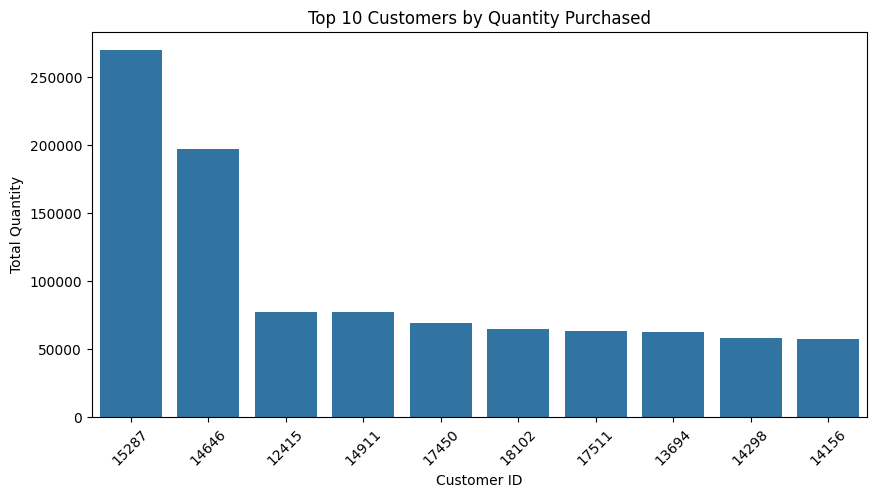

In [9]:
# 📊 7. Quick Visualization (Optional)
top_customers = customer_sales.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')
plt.show()

In [10]:
# 📦 8. Final Clean Dataset
print(df.info())
df.to_csv("Online_Retail_Clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  category      
 1   StockCode    536641 non-null  category      
 2   Description  536641 non-null  category      
 3   Quantity     536641 non-null  int32         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float32       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  category      
dtypes: category(4), datetime64[ns](1), float32(1), int32(1), object(1)
memory usage: 17.4+ MB
None


## 📝 9. Summary & Lessons Learned
- Removed duplicates and reset index to keep data aligned.
- Filled missing descriptions and handled missing CustomerID values.
- Separated credit transactions for further analysis.
- Optimized data types to reduce memory usage.
- Faced a `groupby` issue with categorical CustomerID — solved by converting to string.
- Dataset is now clean and ready for analysis or modeling.